### Aims:
show: 
   - range of pools and schedules
   - show that most pools are small
   - range of employee to shift per pool ratio 

In [4]:
import pandas as pd
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
plots = "/Users/benplatten/workspace/UvA_Thesis/FINAL_REPORT/plots/"

In [ ]:
title=
name=
sns.set_context("talk")

plot = ## .set_title(title)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

In [6]:
with open('../../../data/iplan_column_names.pkl', 'rb') as f:
    column_names = pickle.load(f)

#with open('../data/iplan_date_columns.pkl', 'rb') as f:
#    date_columns = pickle.load(f)
date_columns = ['repository_timestamp','start_date_time','end_date_time']

data_folder = '../../../data/'
data_file = 'repo_iplan_employee_in_shift_20200210-20200216.csv'

In [7]:
usecols=["repository_timestamp",
                "id",
                "shift_id",
                "start_date_time",
                "end_date_time",
                "employee_id",
                "pool_employee_id",
                 "pool_id"]

In [8]:
df = pd.read_csv(data_folder+data_file,names=column_names, parse_dates=date_columns,usecols=usecols)

In [9]:
df.shape

(248119, 8)

In [10]:
df.head(2)

,repository_timestamp,id,shift_id,start_date_time,end_date_time,pool_id,employee_id,pool_employee_id
0,2020-08-18 20:22:52.059095,126361814,131254489,2020-02-12 08:00:00,2020-02-12 17:00:00,4550,823499,1136288
1,2020-08-18 20:22:52.059095,125706123,131073033,2020-02-13 15:15:00,2020-02-13 18:00:00,5314,851774,1172843


### Summary Statistics

In [11]:
print(f"Data from date range: {df.start_date_time.min()} - {df.start_date_time.max()}")
print(f"Number of pools: {df.pool_id.nunique()}")
print(f"Number of shifts: {df.shift_id.nunique()}")
print(f"Number of employees: {df.employee_id.nunique()}")
print(f"Number of pool employee id: {df.pool_employee_id.nunique()} (employees can be in more than 1 pool)")

Data from date range: 2020-02-09 00:01:00 - 2020-02-16 23:00:00
Number of pools: 472
Number of shifts: 72017
Number of employees: 39967
Number of pool employee id: 40733 (employees can be in more than 1 pool)


### What should the audience conclude from my EDA visualisations?

Range in complexity - small pools and very large pool  
But most (some...) are small  


In [12]:
pool_df = df.groupby(['pool_id']).agg({
                    'shift_id':lambda x: x.nunique(),
                    'employee_id':lambda x: x.nunique()}).reset_index()

pool_df.columns = ['pool_id','shift_count','employee_count']
pool_df['shift_emp_ratio'] = pool_df['shift_count'] / pool_df['employee_count'] 

pool_df.head(2)

,pool_id,shift_count,employee_count,shift_emp_ratio
0,1,24,11,2.181818
1,24,90,62,1.451613


In [13]:
print(f"Smallest pool by shifts: {pool_df.shift_count.min()}")
print(f"Largest pool by shifts: {pool_df.shift_count.max()}")
# largest pool

Smallest pool by shifts: 2
Largest pool by shifts: 2972


In [14]:
pool_df['shift_emp_ratio'].mean()

2.052800127930148

In [15]:
pool_df[pool_df['shift_emp_ratio'] >5]

,pool_id,shift_count,employee_count,shift_emp_ratio
382,18224,14,2,7.0


#### Shift analysis

In [14]:
pool_df["shift_count"][pool_df["shift_count"]>500].count()

28

Text(0.5, 1.0, 'Count of shifts per Pool')

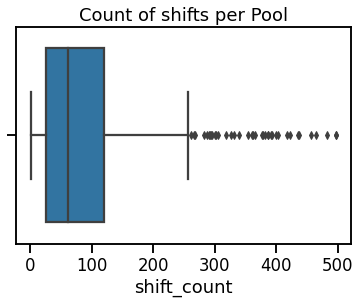

In [39]:
sns.boxplot(x=pool_df["shift_count"][pool_df["shift_count"]<500]).set_title('Count of shifts per pool')

In [18]:
print(pool_df.shift_count.mean())
print(pool_df["shift_count"][pool_df["shift_count"]<500].mean())
print(pool_df["shift_count"][pool_df["shift_count"]<500].median())

152.57838983050848
95.14414414414415
61.5


In [16]:
print(f"pools with less shifts than the mean: {pool_df['shift_count'][pool_df['shift_count']<95].count()}")
print(f"pools with more shifts than the mean: {pool_df['shift_count'][pool_df['shift_count']>95].count()}")
print(f"pools with less shifts than the median: {pool_df['shift_count'][pool_df['shift_count']<61].count()}")
print(f"pools with more shifts than the mean: {pool_df['shift_count'][pool_df['shift_count']>95].count()}")
print(f"pools with a small shift count: {pool_df['shift_count'][pool_df['shift_count']<15].count()}")
print(f"% small pools: {(pool_df['shift_count'][pool_df['shift_count']<15].count() / len(pool_df))*100}")

pools with less shifts than the mean: 294
pools with more shifts than the mean: 175
pools with less shifts than the median: 220
pools with more shifts than the mean: 175
pools with a small shift count: 67
% small pools: 14.194915254237289


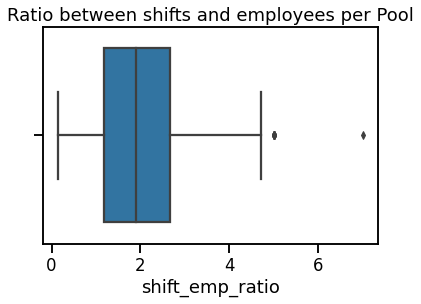

In [64]:
title='Ratio between shifts and employees per Pool'
name='shift_emp_ratio'

plot = sns.boxplot(x=pool_df["shift_emp_ratio"]).set_title(title)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

#### Matching schedules

In [17]:
match_df = pool_df[pool_df.duplicated(subset=["shift_count", "employee_count"], keep=False)].sort_values(['shift_count','employee_count'])
match_df.shape

(38, 4)

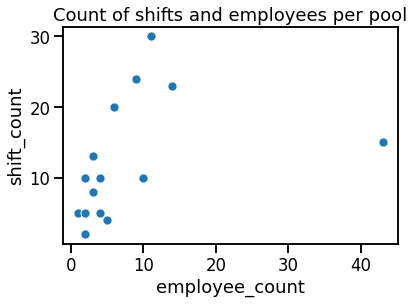

In [74]:
title='Count of shifts and employees per pool'
name='shifts_employees_per_pool_presentation'

plot = sns.scatterplot(data=match_df, x="employee_count", y="shift_count").set_title(title)

#fig = plot.get_figure()
#fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

In [86]:
pool_df.dtypes

pool_id              int64
shift_count          int64
employee_count       int64
shift_emp_ratio    float64
dtype: object

In [1]:
#match_df

In [98]:
df[df['pool_id']==1783]

,repository_timestamp,id,shift_id,start_date_time,end_date_time,pool_id,employee_id,pool_employee_id
31413,2020-08-18 20:22:52.059095,123665079,128884109,2020-02-11 11:15:00,2020-02-11 12:15:00,1783,860638,1184297
82766,2020-08-18 20:22:52.059095,123665077,128884102,2020-02-11 11:15:00,2020-02-11 12:15:00,1783,848188,1168394


#### Employee analysis 

In [67]:
print(pool_df.employee_count.mean())
print(pool_df["employee_count"][pool_df["employee_count"]<500].mean())
print(pool_df["employee_count"][pool_df["employee_count"]<500].median())

86.29872881355932
65.58951965065502
37.0


In [68]:
pool_df["employee_count"][pool_df["shift_count"]==15]

15     43
273    15
288    19
308     9
353     4
354     6
370    17
373    22
412    11
440     7
449     3
458    16
461    43
Name: employee_count, dtype: int64

In [40]:
emp_df = df.groupby(['employee_id']).agg({
                    'shift_id':lambda x: x.nunique(),
                    'pool_id':lambda x: x.nunique()}).reset_index()

emp_df.columns = ['employee_id','shift_count','pool_count']
#pool_df['shift_emp_ratio'] = pool_df['shift_count'] / pool_df['employee_count'] 

emp_df.head(2)

,employee_id,shift_count,pool_count
0,1614,5,1
1,1665,4,1


In [47]:
emp_df.shift_count.mean()

5.381814997372833

<AxesSubplot:xlabel='shift_count'>

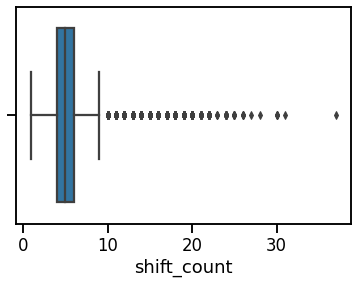

In [42]:
sns.boxplot(x=emp_df["shift_count"])#[pool_df["employee_count"]<300])

Text(0.5, 1.0, 'Count of employees per Pool')

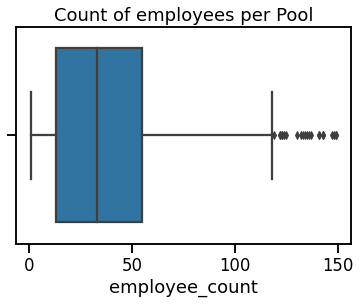

In [56]:

sns.boxplot(x=pool_df["employee_count"][pool_df["employee_count"]<150]).set_title('Count of employees per Pool')

In [34]:
print(pool_df.employee_count.mean())
print(pool_df["employee_count"][pool_df["employee_count"]<300].mean())

86.29872881355932
57.33856502242153


In [18]:
trimmed_pool_df = pool_df[(pool_df["employee_count"]<300) & (pool_df["shift_count"]<500)]

NameError: name 'title' is not defined

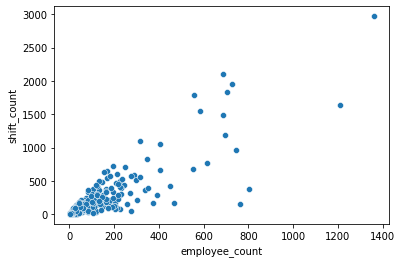

In [19]:
plot = sns.scatterplot(data=pool_df, x="employee_count", y="shift_count").set_title(title)

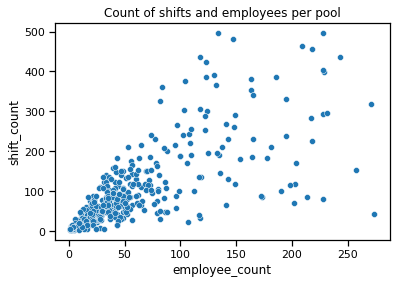

In [22]:
sns.set_context("notebook")

title='Count of shifts and employees per pool'
name='shifts_employees_per_pool_notebook'

plot = sns.scatterplot(data=trimmed_pool_df, x="employee_count", y="shift_count").set_title(title)

fig = plot.get_figure()
#fig.savefig(f"{plots}{name}.png",bbox_inches='tight')

/Users/benplatten/.pyenv/versions/werkcollege/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/benplatten/.pyenv/versions/werkcollege/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


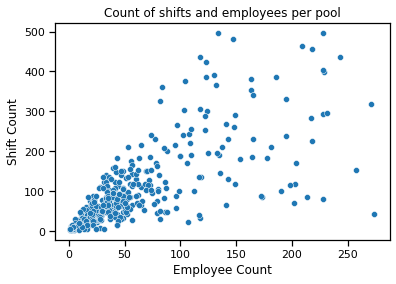

In [25]:
sns.set_context("notebook")

trimmed_pool_df['Employee Count'] = trimmed_pool_df['employee_count']
trimmed_pool_df['Shift Count'] = trimmed_pool_df['shift_count']

title='Count of shifts and employees per pool'
name='shifts_employees_per_pool_notebook'

plot = sns.scatterplot(data=trimmed_pool_df, x="Employee Count", y="Shift Count").set_title(title)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

/Users/benplatten/.pyenv/versions/werkcollege/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


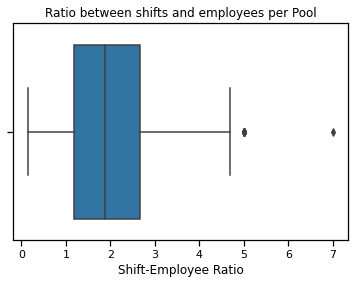

In [26]:
trimmed_pool_df['Shift-Employee Ratio'] = trimmed_pool_df['shift_emp_ratio']


title='Ratio between shifts and employees per Pool'
name='shift_emp_ratio_trimmed_notebook'

plot = sns.boxplot(x=trimmed_pool_df["Shift-Employee Ratio"]).set_title(title)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

<AxesSubplot:xlabel='employee_count', ylabel='shift_count'>

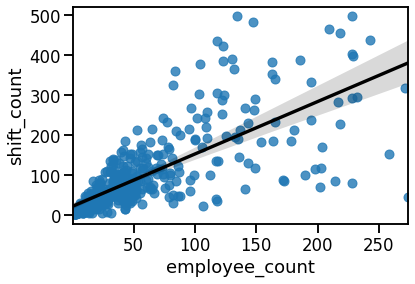

In [36]:
name=
sns.set_context("talk")

sns.regplot(data=trimmed_pool_df, x="employee_count", y="shift_count",line_kws={"color": "black"})


In [11]:
pool_df[pool_df["employee_count"]> pool_df["shift_count"]]

,pool_id,shift_count,employee_count,shift_emp_ratio
15,152,15,43,0.348837
19,168,153,258,0.593023
20,174,166,375,0.442667
21,184,170,204,0.833333
25,229,117,149,0.785235
...,...,...,...,...
458,20643,15,16,0.937500
459,20663,293,393,0.745547
461,20703,15,43,0.348837
467,20783,4,9,0.444444


### Testing complexity calculation

In [2]:
import itertools

In [3]:
def complexCalc(shift_count,employee_count):
    list1= range(shift_count)
    list2= range(employee_count)
    
    return len([list(zip(x,list2)) for x in itertools.permutations(list1,len(list2))])
    

In [13]:
complexCalc(6,2)

30

### Analysis: accepted, realised and confirmed

In [9]:
# accept_by_employee_date_time
# 

pooldf = df[['pool_id','shift_id','employee_id']].groupby(['pool_id']).agg({ 'shift_id' : 'nunique', 'employee_id' : 'nunique'})
pooldf.columns = ['num_shifts','num_employees']

In [12]:
print(len(pooldf[pooldf['num_shifts'] > 7]))
print(len(pooldf[pooldf['num_shifts'] <= 7]))

440
32


In [14]:
mediumPools = pooldf[(pooldf['num_shifts'] > 7) & (pooldf['num_shifts'] < 200)]
mediumPools.shape

(355, 2)

In [15]:
mediumPools.head()

,num_shifts,num_employees
pool_id,,
1,24,11
24,90,62
29,51,15
32,80,23
66,8,3
